# Air Quality Data Analysis
## Dataset acquired from UCI

In [6]:
import pandas as pd
data = pd.read_csv('AirQualityUCI.csv', delimiter=';')
data = data.drop('Unnamed: 15', 1)
data = data.drop('Unnamed: 16', 1)
print(data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

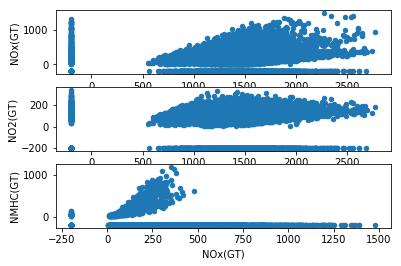

In [7]:
# Creating plots to better analyse the data
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
data.plot('PT08.S4(NO2)','NOx(GT)',kind='scatter', ax=ax1)
data.plot('PT08.S4(NO2)','NO2(GT)',kind='scatter', ax=ax2)
data.plot('NOx(GT)','NMHC(GT)',kind='scatter', ax=ax3)
plt.show()

In [8]:
def remove_char(series):
    val = str(series).replace(',','.')
    return float(val)

data['T'] =  data['T'].apply(remove_char)
data['CO(GT)'] =  data['CO(GT)'].apply(remove_char)
data['C6H6(GT)'] =  data['C6H6(GT)'].apply(remove_char)
data['RH'] =  data['RH'].apply(remove_char)
data['AH'] = data['AH'].apply(remove_char)
print(data.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [10]:
# Convert the AH to normal percentages
data['AH'] = data['AH']* 10
print(data.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH     AH  
0  13.6  48.9  75.78  
1  13.3  47.7  72.55  
2  11.9  54.0  75.02  
3  11.0  60.0  78.67  
4

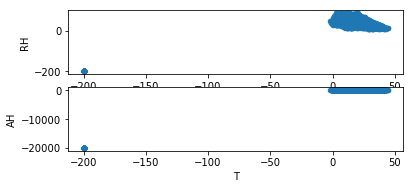

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
data.plot('T','RH',kind='scatter', ax=ax1)
data.plot('T','AH',kind='scatter', ax=ax2)
plt.show()

In [12]:
# Applying Machine Learning Models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
data = data[pd.notnull(data['T'])]
data = data[pd.notnull(data['NOx(GT)'])]
data = data[pd.notnull(data['PT08.S4(NO2)'])]
lr.fit(data[['PT08.S4(NO2)']], data['NOx(GT)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Make Predictions 
predictions = lr.predict(data[['PT08.S4(NO2)']])
print(predictions[:5])
print(data['NOx(GT)'].head())

[ 174.50293702  171.89801052  171.81966686  172.38765836  170.54658249]
0    166.0
1    103.0
2    131.0
3    172.0
4    131.0
Name: NOx(GT), dtype: float64


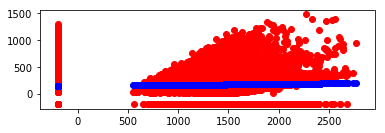

In [14]:
# Make Comparison plots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(data['PT08.S4(NO2)'], data['NOx(GT)'], color='red')
ax1.scatter(data['PT08.S4(NO2)'], predictions, color='blue')
plt.show()

In [15]:
# Calculating the error measure
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data['NOx(GT)'], predictions)
print(mse)

66181.3858403


In [16]:
# Calculating RMSE 
rmse = mse ** (1/2)
print(rmse)

257.257431069


In [17]:
print(data.shape[0])
data = data[data['PT08.S4(NO2)'] != -200]
print(data.shape[0])

9357
8991


In [18]:
print(data.mean())

CO(GT)            -34.897053
PT08.S1(CO)      1099.833166
NMHC(GT)         -158.702591
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           163.745078
PT08.S3(NOx)      835.493605
NO2(GT)            56.666555
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                102.553027
dtype: float64


In [19]:
# Calculating the euclidean distance between different params
print(data.head())
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(data.iloc[:,2:], data.iloc[:,2:])
print(distance)

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH     AH  
0  13.6  48.9  75.78  
1  13.3  47.7  72.55  
2  11.9  54.0  75.02  
3  11.0  60.0  78.67  
4

In [20]:
# Using KMeans to create clusters
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
items_distances = kmeans_model.fit_transform(data.iloc[:,2:])
print(items_distances)

[[  867.58829473   595.37752788]
 [  612.55263807   848.92784277]
 [  693.01208979   771.14694677]
 ..., 
 [  649.75589053   641.04989116]
 [  470.79259758  1041.65442723]
 [  525.36068699   912.17755454]]


In [27]:
# Applying KMeans and visulaizing the data
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)
k_means.fit(data[['PT08.S4(NO2)','NOx(GT)']])
data['clusters'] = k_means.labels_
print(data.tail())


            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH     AH  clusters  
9352       1729.0  21.9  29.3  75.68         1  
9353       1269.0  24.3  23.7  71.19         1  
9354       

In [32]:
# Calculating the cost function
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data['NOx(GT)'].reshape(-1,1), data['NO2(GT)'])
theta1 = model.coef_[0]
print(theta1)

0.413418982191


/Users/navneetmkumar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [33]:
# Cost function
def cost(theta0, theta1, x, y):
    # Initialize cost
    J = 0
    # The number of observations
    m = len(x)
    # Loop through each observation
    for i in range(m):
        # Compute the hypothesis 
        h = theta1 * x[i] + theta0
        # Add to cost
        J += (h - y[i])**2
    # Average and normalize cost
    J /= (2*m)
    return J

In [35]:
# Gradient Descent Function
def gradient_descent(x,y,alpha=0.01, theta0=0, theta1=0):
    max_epochs=100
    counter = 0      # Intialize a counter
    c = cost(theta1, theta0, data['NOx(GT)'].reshape(-1,1), data['NO2(GT)'])  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial deriviative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        #             so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, data['NOx(GT)'].reshape(-1,1), data['NO2(GT)'])

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}
    

In [36]:
# Creation of neural networks
# Creating the sigmoid_activation function
def sigmoid_activation(x, theta):
    z = np.dot(theta.T, x)
    ex = np.exp(-z)
    ex = 1+ex
    h = 1/ex
    return h

In [38]:
# Creating the cost function for neural network
def cost(x,y,theta):
    h = sigmoid_activation(x, theta)
    for i in range(len(x)):
        z = y[i]*np.log(h[i])
        w = (1-y[i])*np.log(1-h[i])
        k += z+w
    k = -1*(k/len(x))
    return k

In [39]:
# Calculating the gradients
def gradients(x,y, theta):
    grads = 0
    for j, obs in enumerate(x):
        h = sigmoid_activation(obs, theta_init)
        # Get delta
        delta = (y[j]-h) * h * (1-h) * obs
        # accumulate
        grads += delta[:,np.newaxis]/x.shape[0]
    return grads

In [41]:
import numpy as np
# Creating the learning function

# Initializing the weights
theta_init = np.random.normal(0,0.01,size=(5,1))
# set a learning rate
learning_rate = 0.1
# maximum number of iterations for gradient descent
maxepochs = 10000       
# costs convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001  


def learn(x, y, theta, learning_rate, maxepochs, convergence_thres):
    costs = []
    cost = cost(x,y,theta)
    costprev = cost + convergence_thres + 0.01
    counter = 0
    for counter in range(maxepochs):
        for j, obs in enumerate(x):
            h = sigmoid_activation(obs, theta_init)
            delta = (y[j]-h)*h*(1-h)*obs
            grads += delta[:,np.newaxis]/x.shape[0]
        
        
        theta += grads*learning_rate
        counter +=1
        costprev = cost
        cost = cost(x,y,theta)
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
    return theta


In [42]:
# Creating the feedforward function

#Initializing the weights
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))


def feedforward(x, theta0, theta1):
    # Check the matrix shapes closely inorder to avoid any dot product errors
    a1 = sigmoid_activation(x.T,theta0).T
    # Add a column of ones to the hidden layer to include the bias term
    a1 = np.column_stack([np.ones(a1.shape[0]), a1])
    out = sigmoid_activation(a1.T, theta1)
    return out



In [44]:
# Creating the new_cost function

def new_cost(x,y,theta0, theta1):
    h = feedforward(x,theta0, theta1)
    inner = y*np.log(h) + (1-y)*np.log(1-h)
    return -np.mean(inner)